In [17]:
import numpy as np
import matplotlib.pyplot as plt

class IMF_salpeter():
    default_mmin = 0.3
    default_mmax = 120
    def __init__(self, alpha=2.35, mmin=None, mmax=None):

        self._mmin = self.default_mmin if mmin is None else mmin
        self._mmax = self.default_mmax if mmax is None else mmax

        self.alpha = alpha
        self.normfactor = 1

        self.slope = -alpha
        assert (self._mmin < self._mmax)
        assert (self._mmin > 0)
        assert (self._mmin != -1)

    def pdf(self, x):
        return x**self.slope * (self.slope + 1) / (
            self._mmax**(self.slope + 1) -
            self._mmin **(self.slope + 1)) * (x >= self._mmin ) * (x <= self._mmax)
    
    def cdf(self, x):
        return (np.clip(x, self._mmin , self._mmax)**(self.slope + 1) -
                (self._mmin**(self.slope + 1))) / (self._mmax**(self.slope + 1) -
                                                self._mmin**(self.slope + 1))

    def __call__(self, m, integral_form=False):
        if not integral_form:
            return self.pdf(m) * self.normfactor
        else:
            return self.cdf(m) * self.normfactor


In [50]:
mass = np.linspace(12, 100, 20)
sal = IMF_salpeter(mmin=12, mmax=100)
density = sal.__call__(mass,integral_form=False)

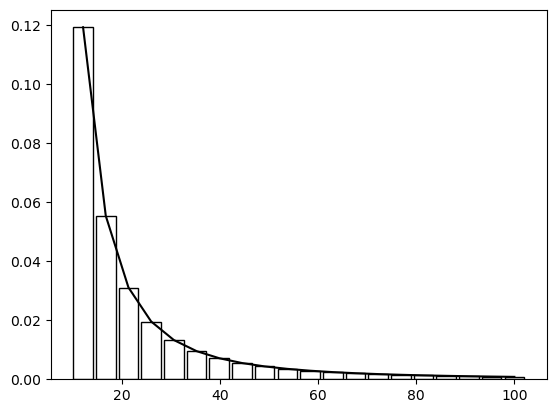

In [56]:
fig = plt.figure()
plt.bar(mass, density, width=4, fill=False)
plt.plot(mass, density, color='black', )
plt.show()